# Нахождение закономерности определяющие успешность игры

**Для интренет магазина "Стримчик" надо найти факторы влияющие на успешность игры, для составлении рекламной компании на 2017 год. Данные для анализа взяты из открытого доступа за прошлые года**


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

## Изучение данных

In [3]:
df = pd.read_csv('/datasets/games.csv') #Откроем датафрейм

In [4]:
df.head() #Выведем 5 первых строк

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В данных есть 11 столбцов\
Name - название игры\
Platform — платформа\
Year_of_Release — год выпуска\
Genre — жанр игры\
NA_sales — продажи в Северной Америке (миллионы проданных копий)\
EU_sales — продажи в Европе (миллионы проданных копий)\
JP_sales — продажи в Японии (миллионы проданных копий)\
Other_sales — продажи в других странах (миллионы проданных копий)\
Critic_Score — оценка критиков (максимум 100)\
User_Score — оценка пользователей (максимум 10)\
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

**Промежуточный вывод:**\
Надо изменить тип данных в 3 столбцах, 'Year_of_Release', 'critic_score' к int и в столбце 'User_Score' к float\
Привести все заголовки столбцов к нижнему регистру\



## Подготовка данных

### Изменение названия столбцов и типов данных

In [6]:
df.columns = df.columns.str.lower() #Привидем названия столбцов к нижнему регистру

In [7]:
df = df.astype({'year_of_release': "Int64", 'critic_score':"Int64"})


Изменим тип данных в двух столбцах на int, так как и год выпуска и оценка критиков должна отображаться в целом формате

**В рейтинге пользавателей есть значение tbd, в данном случае tbd обозначает to be announced, то есть игра еще не вышла в открытый доступ. Поэтому заменим значение tbd на Nan и поменяем тип столбца на float**


In [8]:
df['user_score'] = df['user_score'].replace({'tbd':np.nan})
df = df.astype({'user_score': "float"})

### Проверка данных на неявные дубликаты

Изменим названия в столбце platform, для больщей наглядности

In [9]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [10]:
#df['platform'] = df['platform'].replace({'Wii':'Nintendo Wii','NES':'Nintendo NES','GB':'GB-60',\
                                        #'DS':'Nintendo DS', 'X360':'Xbox 360', 'SNES':'Nintendo SNES','GBA':'Game Boy Advance',\
                                         #'3DS':'Nintendo 3DS','N64':'Nintendo 64','XB':'Xbox','2600':'Atari 2600','XOne':'Xbox One',\
                                         #'WiiU':'Nintendo Wii U','GC':'Nintendo GameCube','GEN':'SEGA Retro Genesis',\
                                         #'DC':'Dendy Classic','PSV':'PS Vita','SAT':'Sega Saturn','WS':'WonderSwan',\
                                         #'TG16':'NEC TurboGrafx','3DO':'Panasonic 3DO','GG':'Game Gear','PCFX':'NEC PC-FX'})
#df['platform'].unique() #Заменим и проверим данные в столбце platform

Проверим два столбца rating и genre для проверки неявных дубликатов

In [11]:
print(df['rating'].unique())
df['genre'].unique()
#Можем заметить, что в столбце rating есть повторение E10+ и К-A это одна и та же возрастная группа, так что изменим данные,
#Так же добавим уточнение в обозначение для наглядности

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']


array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [12]:
df['rating'] = df['rating'].replace({'K-A':'E10+','E':'E (6+)','M':'M (17+)','T':'T (16+)','AO':'AO (18+)','EC':'EC (0+)'})
df['rating'].unique()

array(['E (6+)', nan, 'M (17+)', 'T (16+)', 'E10+', 'AO (18+)', 'EC (0+)',
       'RP'], dtype=object)

### Обработка пропусков

In [13]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Видно, что есть пропуски в 6 столбцах, разберемся с ними по порядку 

Присутствуют два пропуска, с учетом того, что имя игры никак не восстановить проще эти строки удалить\
Пропуски появились из-за ошибки при сборе данных или у игры еще не было названия

In [14]:
df['name'].isna().sum()


2

In [15]:
df = df.dropna(subset=['name']).reset_index(drop=True)

In [16]:
df['year_of_release'].isna().sum()
#Пропуски в годах составляют около 1% данных, так что эти данные тоже лучше убрать
#Пропуски появились в результате ошибки при сборе или игра еще не выпущенна

269

In [17]:
df = df.dropna(subset=['year_of_release']).reset_index(drop=True)

In [18]:
df['rating'] = df['rating'].fillna(value='Non rating')

А вот пропуски в оценках и рейтинге оставим как есть. Может быть несколько причин пропуска\
-Игра еще не вышла\
-Игра не очень популярна и на нее нет оценок\
-Оценки пропали во время переноса данных \
В любом случае это слишком большой объем данных и удалить или заполнить их не предоставляется возможным 

### Обработаем дубликаты

In [19]:
df[df.duplicated()] #Проверка явных дубликатов

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


### Посчитаем продажи по всем регионам

In [20]:
df['sum_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

**Промежуточные выводы:**
Обработали все данные, привели столбцы к необходимым типам.\
Обработали пропуски в 2 столбцах:\
name : название игры, было пропущено меньше 1% поэтому из-за невозможности восстановить данные они были удаленны\
year_of_release : год выпуска игры, было потеряно около 1% данных, что не скажется на результатах поэтому данные были удаленны\

В столбцах с оценками, не коректно будет заполнять данные, от этого могут исказиться результаты, поэтому оставляем эти столбцы с пропусками

В конце была проведена проверка на дубликаты и добавлен столбец с общими продажами\
Теперь данные готовы к анализу


## Иследовательский анализ данных

### Кол-во игр в разные годы

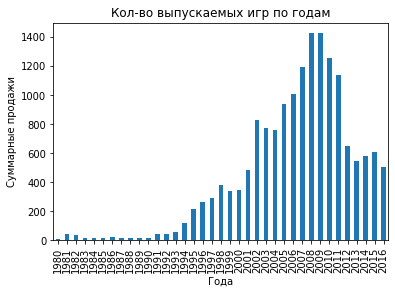

In [22]:
df.groupby('year_of_release')['name'].count().plot(kind='bar', title='Кол-во выпускаемых игр по годам', xlabel='Года'\
                                                   , ylabel='Суммарные продажи');
#Узнаем как менялось кол-во игр по годам

По графику видно, что пик выпуска игр был в 2008-2009 году, потом пошел спад. Для анализа нам потребуются данные за 2016 год, но можно взять последние 2-3 года для более точных данных, так как тенденция одна

### Популярность жанров

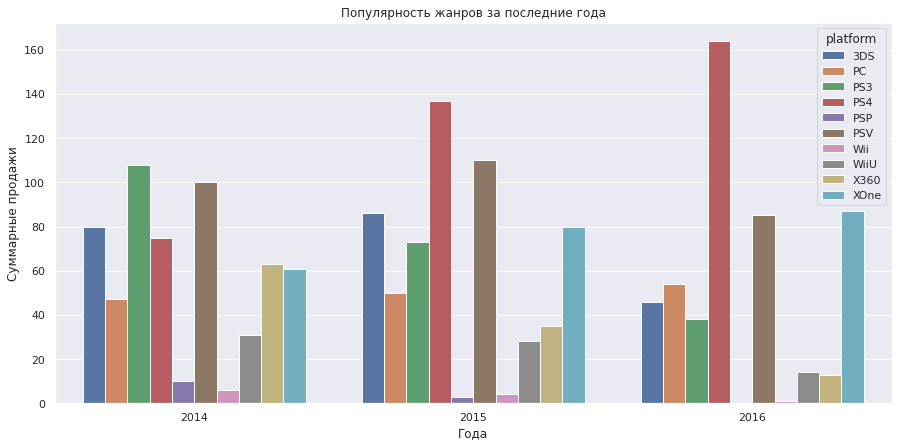

In [23]:
df_new = df[df['year_of_release']>=2014]
t = pd.pivot_table(df_new,index=['year_of_release','platform'],aggfunc='count',values='sum_sales',fill_value=0).reset_index()
sns.set (rc={"figure.figsize":( 15 , 7 )})
sns.barplot(x='year_of_release', y="sum_sales", hue="platform", data=t,).set(title = 'Популярность жанров за последние года',\
                                                                             xlabel='Года', ylabel = 'Суммарные продажи');

По графику по всем платформам видно, что с 2014 по 2016 используются только 10 платформ для выпуска игр, но так же можно заметить падающий интерес к nintendo wii, psp, ps3, xbox 360. Падения можно объяснить выходом нового поколения консолей (ps3->ps4, xbox 360 -> xbox one), так же новые консоли очень быстро занимают рынок и вымещают остальные консоли

### Топ платформ

In [24]:
top_platforms = df_new.groupby('platform')['sum_sales'].sum().sort_values(ascending=False).head(10).reset_index()
# создадим список топ-10 платформ по кол-ву игр
top_platforms

,platform,sum_sales
0,PS4,288.15
1,XOne,140.36
2,3DS,86.68
3,PS3,68.18
4,X360,48.22
5,WiiU,42.98
6,PC,27.05
7,PSV,22.40
8,Wii,5.07
9,PSP,0.36


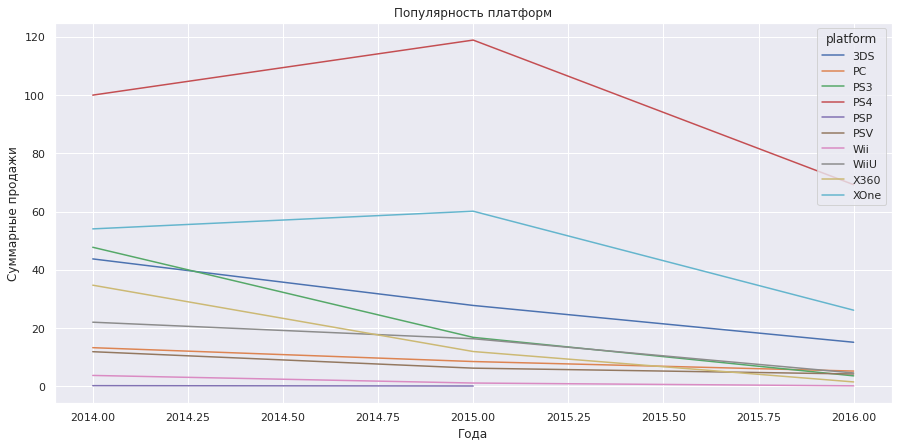

In [25]:
df_new.pivot_table(index='year_of_release', columns = 'platform', values='sum_sales', aggfunc='sum')\
.plot(grid=True, figsize=(15, 7), title='Популярность платформ', xlabel='Года', ylabel = 'Суммарные продажи');

По графику хорошо видно, что почти все платформы стремятся к 0, кроме ps4,xbox one

### Срок жизни платформы

**Проверим за какие сроки появляются новые и исчезают старые платформы, возьмем популярные платформы, но которые уже начали терять позиции, чтобы отследить время исчезновения**

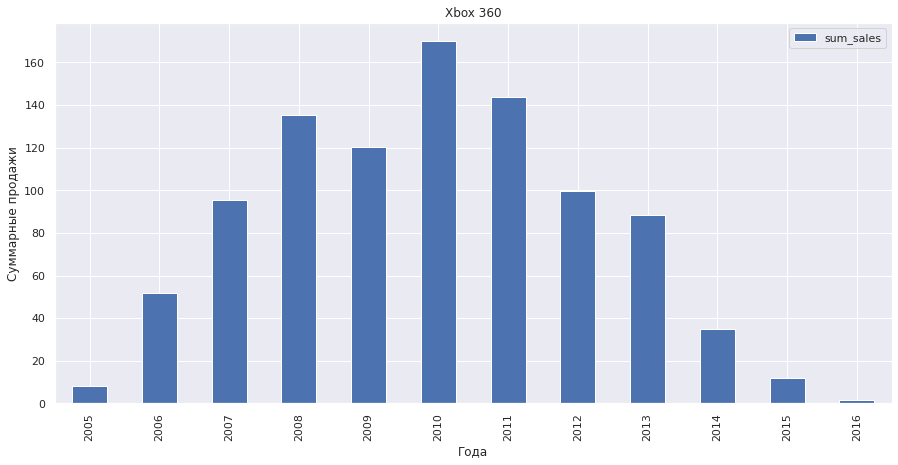

In [26]:
df[df['platform']=='X360'].pivot_table(index=['year_of_release','platform'],aggfunc='sum',values='sum_sales').reset_index()\
.plot(x='year_of_release',kind='bar', title='Xbox 360', xlabel='Года', ylabel = 'Суммарные продажи');

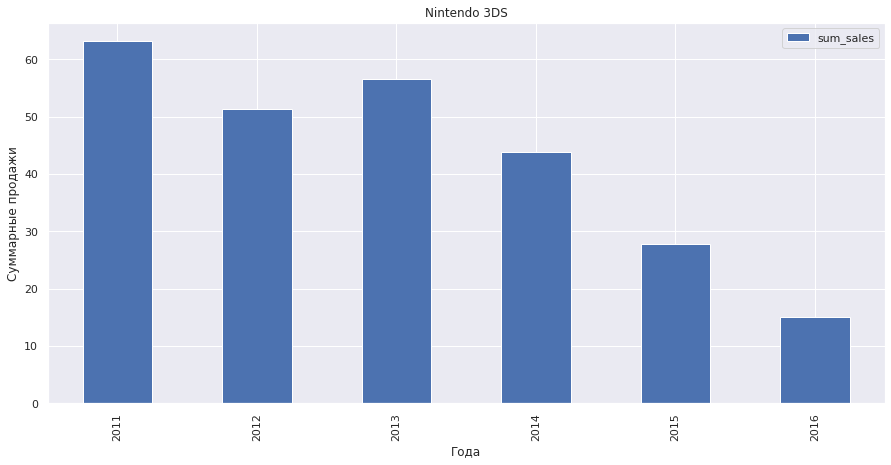

In [27]:
df[df['platform']=='3DS'].pivot_table(index=['year_of_release','platform'],aggfunc='sum',values='sum_sales').reset_index()\
.plot(x='year_of_release',kind='bar', title='Nintendo 3DS', xlabel='Года', ylabel = 'Суммарные продажи');

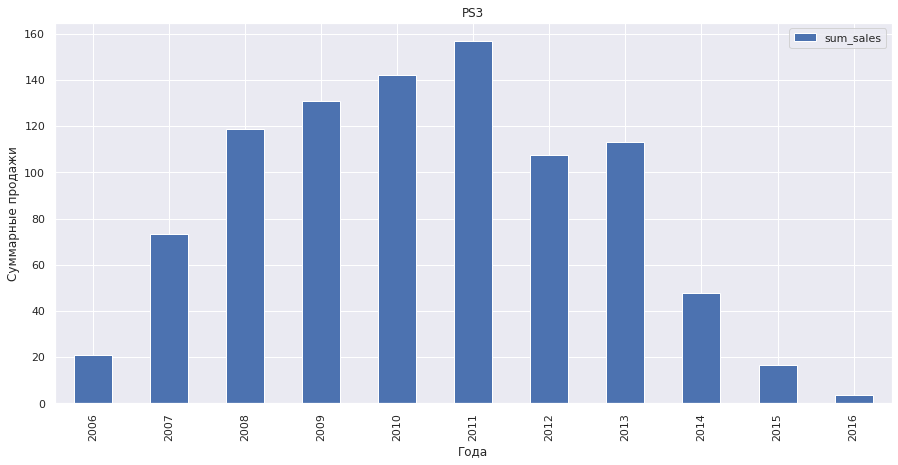

In [28]:
df[df['platform']=='PS3'].pivot_table(index=['year_of_release','platform'],aggfunc='sum',values='sum_sales').reset_index()\
.plot(x='year_of_release',kind='bar', title='PS3', xlabel='Года', ylabel = 'Суммарные продажи');

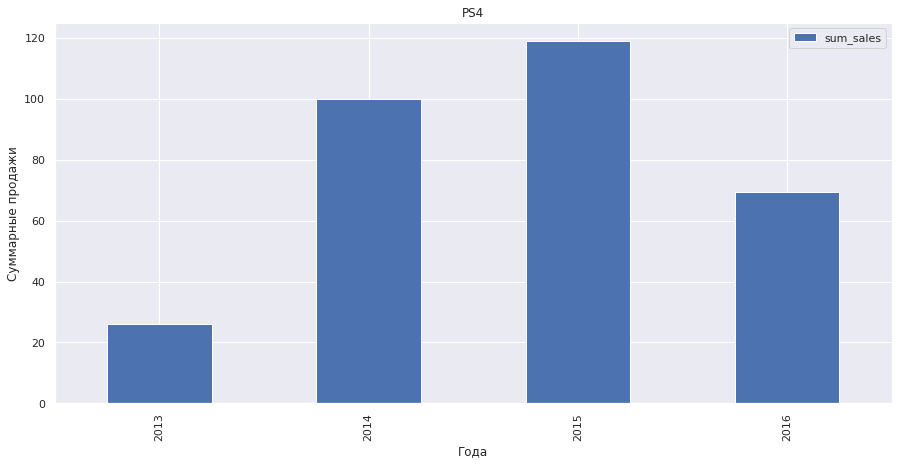

In [29]:
df[df['platform']=='PS4'].pivot_table(index=['year_of_release','platform'],aggfunc='sum',values='sum_sales').reset_index()\
.plot(x='year_of_release',kind='bar', title='PS4', xlabel='Года', ylabel = 'Суммарные продажи');

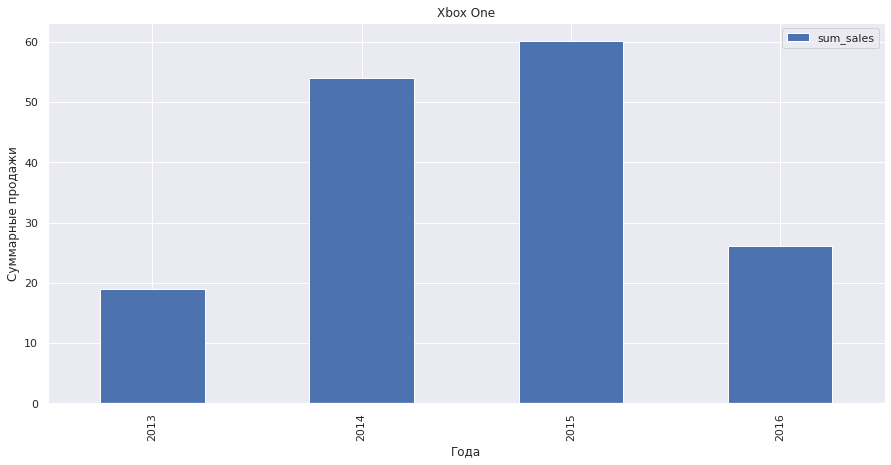

In [30]:
df[df['platform']=='XOne'].pivot_table(index=['year_of_release','platform'],aggfunc='sum',values='sum_sales').reset_index()\
.plot(x='year_of_release',kind='bar', title='Xbox One', xlabel='Года', ylabel = 'Суммарные продажи');

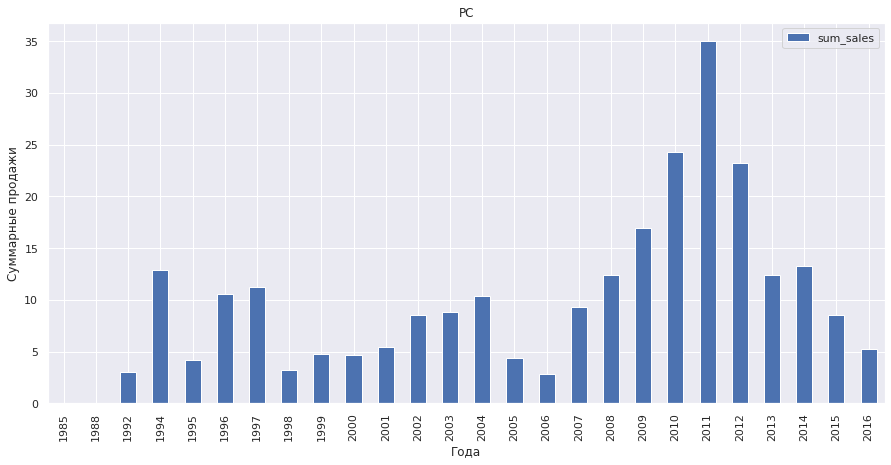

In [31]:
df[df['platform']=='PC'].pivot_table(index=['year_of_release','platform'],aggfunc='sum',values='sum_sales').reset_index()\
.plot(x='year_of_release',kind='bar', title='PC', xlabel='Года', ylabel = 'Суммарные продажи');

Заметим, что продолжительность популярности платформы больше зависит от наличия более продвинутых вариантов платформ. Так почти все платформы (вне зависимости от даты выпуска) начали терять популярность с выходом PS 4 и Xbox One

Надо избавиться от платформ которые теряеют популярность. Поэтому я оставлю 4 платформы PS4, Xbox One, Nintendo 3DS и PC, так как первые три входят в топ по продажам, а PC потому что это платформа старше всех и если посмотреть, то продажи по ней зависят от общего кол-ва выпускаемых игр. Поэтому нельзя однозначно сказать, что PC теряет популярность

In [32]:
top_platforms = top_platforms[(top_platforms['platform']=='PS4') | (top_platforms['platform']=='XOne') \
                              | (top_platforms['platform']=='PC') \
                              | (top_platforms['platform']=='3DS') ].reset_index(drop=True)
top_platforms

,platform,sum_sales
0,PS4,288.15
1,XOne,140.36
2,3DS,86.68
3,PC,27.05


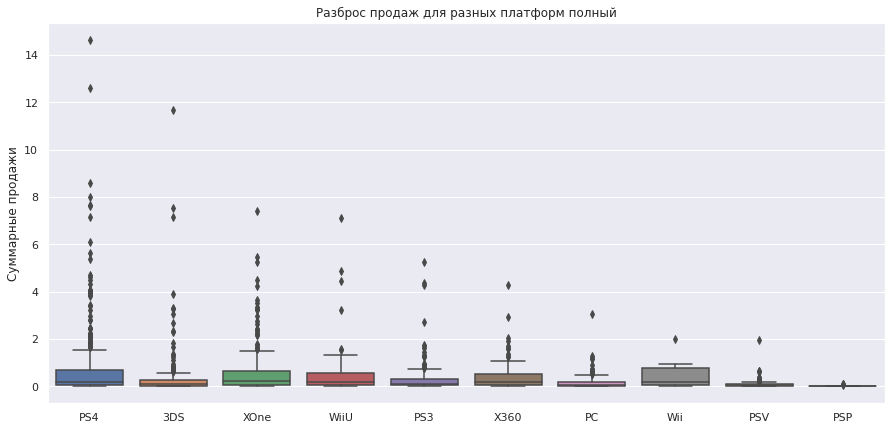

In [34]:

sns.boxplot(data=df_new,x='platform',y='sum_sales').set(title='Разброс продаж для разных платформ полный', xlabel=''\
                                                        , ylabel = 'Суммарные продажи');

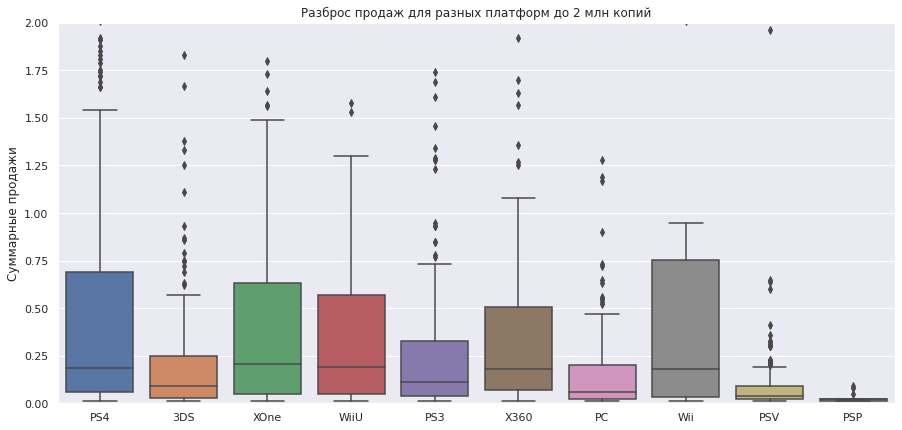

In [35]:
plt.ylim(0,2)
sns.boxplot(data=df_new,x='platform',y='sum_sales').set(title='Разброс продаж для разных платформ до 2 млн копий', xlabel=''\
                                                        , ylabel = 'Суммарные продажи');

**По графику можно отметить, что PS4 и Xbox One очень похоже между собой по продажам, так же как и PC и Nintendo 3DS, у игр на PS4/Xbox One бывают очень популярные проекты (более 1 млн проданных копий)**

### Влияние оценок на продажи

#### PS 4

Корреляция между оценкой пользователей и продажами составляет: -0.040131589472697356


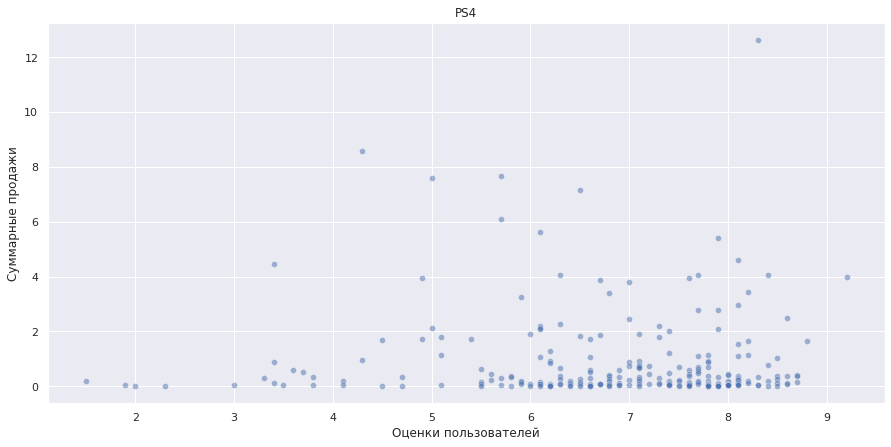

In [36]:
#График зависимости от оценок пользователей на продажи
sns.scatterplot(data = df_new[df_new['platform']=='PS4'], x = 'user_score', y = 'sum_sales',alpha=0.5)\
.set(title='PS4', xlabel='Оценки пользователей', ylabel = 'Суммарные продажи'); 
print('Корреляция между оценкой пользователей и продажами составляет:',\
      df_new.loc[df_new['platform']=='PS4','sum_sales'].corr(df_new.loc[df_new['platform']=='PS4','user_score']))

Корреляция между оценкой критиков и продажами составляет: 0.40266141068104083


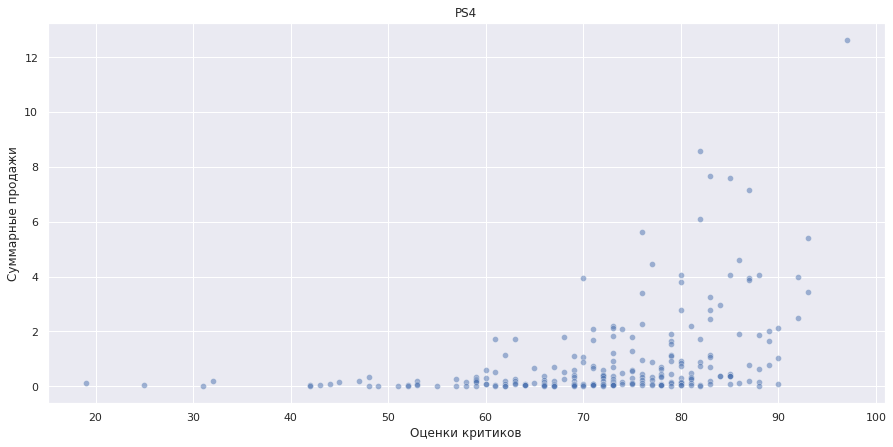

In [37]:
#График зависимости от оценок критиков на продажи
sns.scatterplot(data = df_new[df_new['platform']=='PS4'], x = 'critic_score', y = 'sum_sales',alpha=0.5)\
.set(title='PS4', xlabel='Оценки критиков', ylabel = 'Суммарные продажи'); 
print('Корреляция между оценкой критиков и продажами составляет:',\
      df_new.loc[df_new['platform']=='PS4','sum_sales'].corr(df_new.loc[df_new['platform']=='PS4','critic_score']
                                                             .astype('float64')))

#### Xbox One

Корреляция между оценкой пользователей и продажами составляет: -0.0703839280647581


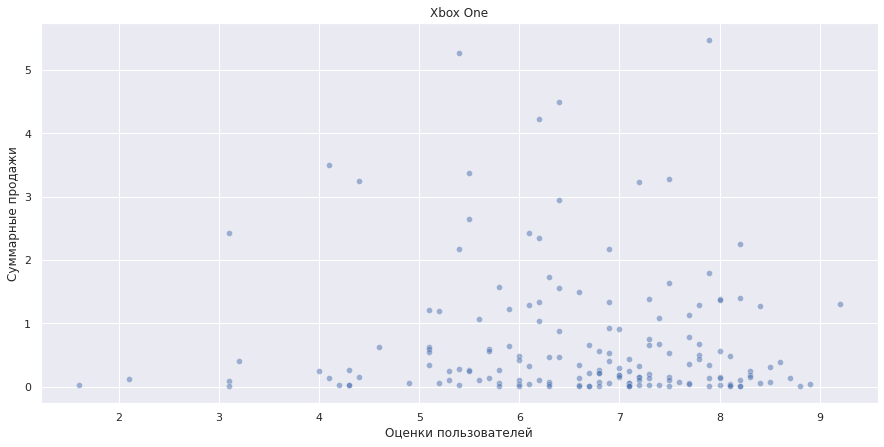

In [38]:
#График зависимости от оценок пользователей на продажи
sns.scatterplot(data = df_new[df_new['platform']=='XOne'], x = 'user_score', y = 'sum_sales',alpha=0.5)\
.set(title='Xbox One', xlabel='Оценки пользователей', ylabel = 'Суммарные продажи'); 
print('Корреляция между оценкой пользователей и продажами составляет:',\
      df_new.loc[df_new['platform']=='XOne','sum_sales'].corr(df_new.loc[df_new['platform']=='XOne','user_score']))

Корреляция между оценкой критиков и продажами составляет: 0.42867694370333226


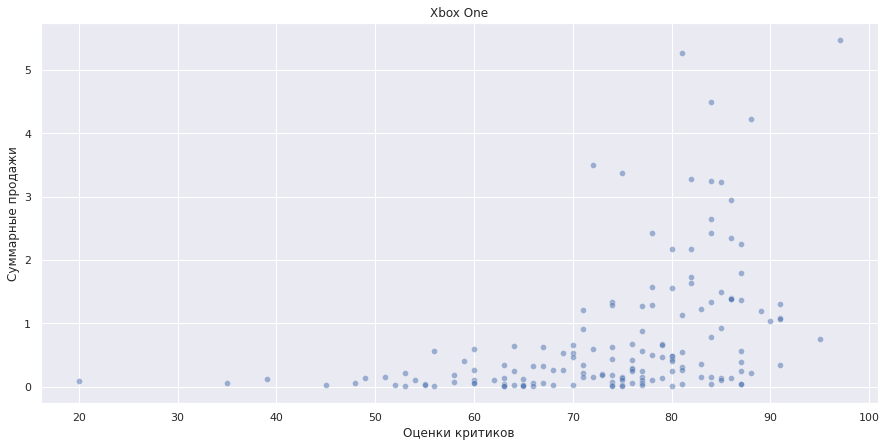

In [39]:
#График зависимости от оценок критиков на продажи
sns.scatterplot(data = df_new[df_new['platform']=='XOne'], x = 'critic_score', y = 'sum_sales',alpha=0.5)\
.set(title='Xbox One', xlabel='Оценки критиков', ylabel = 'Суммарные продажи'); 
print('Корреляция между оценкой критиков и продажами составляет:',\
      df_new.loc[df_new['platform']=='XOne','sum_sales'].corr(df_new.loc[df_new['platform']=='XOne','critic_score']
                                                             .astype('float64')))

#### Nintendo 3DS

Корреляция между оценкой пользователей и продажами составляет: 0.2151932718527028


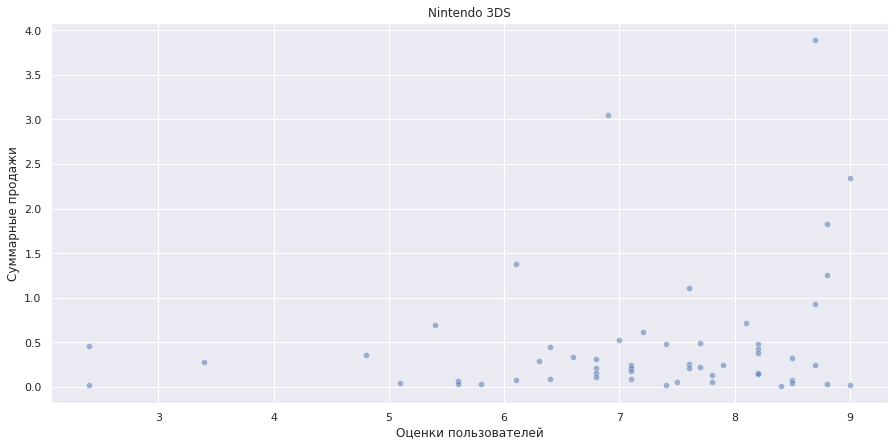

In [40]:
#График зависимости от оценок пользователей на продажи
sns.scatterplot(data = df_new[df_new['platform']=='3DS'], x = 'user_score', y = 'sum_sales',alpha=0.5)\
.set(title='Nintendo 3DS', xlabel='Оценки пользователей', ylabel = 'Суммарные продажи'); 
print('Корреляция между оценкой пользователей и продажами составляет:',\
      df_new.loc[df_new['platform']=='3DS','sum_sales'].corr(df_new.loc[df_new['platform']=='3DS','user_score']))

Корреляция между оценкой критиков и продажами составляет: 0.31411749286905105


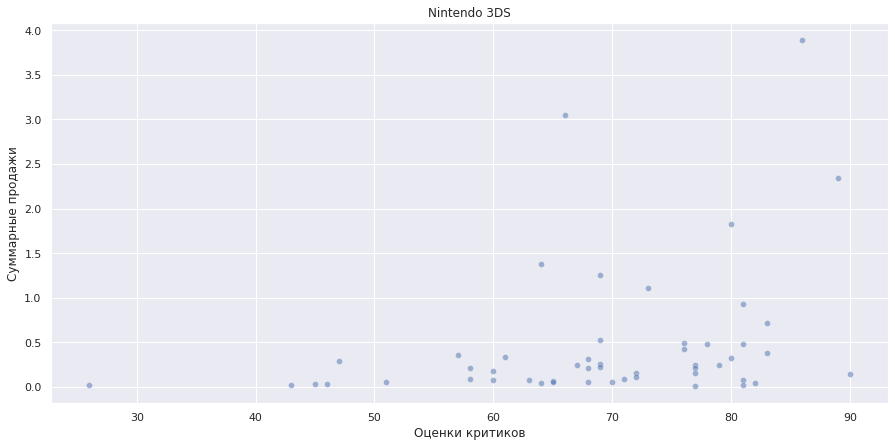

In [41]:
#График зависимости от оценок критиков на продажи
sns.scatterplot(data = df_new[df_new['platform']=='3DS'], x = 'critic_score', y = 'sum_sales',alpha=0.5)\
.set(title='Nintendo 3DS', xlabel='Оценки критиков', ylabel = 'Суммарные продажи'); 
print('Корреляция между оценкой критиков и продажами составляет:',\
      df_new.loc[df_new['platform']=='3DS','sum_sales'].corr(df_new.loc[df_new['platform']=='3DS','critic_score']
                                                             .astype('float64')))

#### PC

Корреляция между оценкой пользователей и продажами составляет: -0.07159665703472452


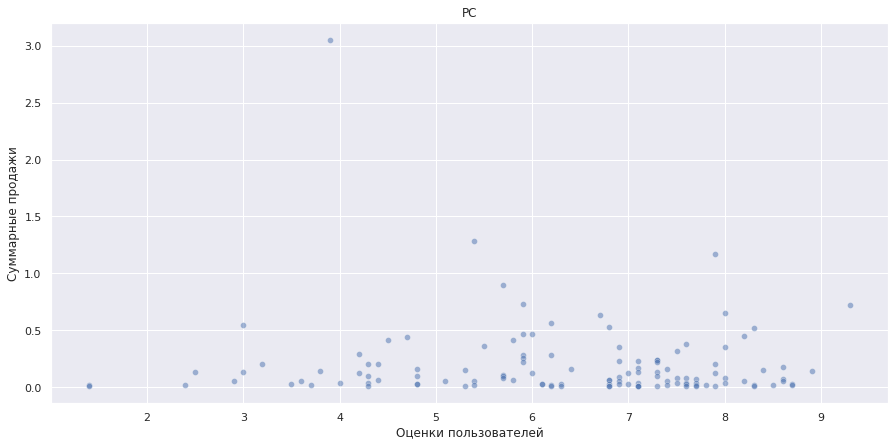

In [42]:
#График зависимости от оценок пользователей на продажи
sns.scatterplot(data = df_new[df_new['platform']=='PC'], x = 'user_score', y = 'sum_sales',alpha=0.5)\
.set(title='PC', xlabel='Оценки пользователей', ylabel = 'Суммарные продажи'); 
print('Корреляция между оценкой пользователей и продажами составляет:',\
      df_new.loc[df_new['platform']=='PC','sum_sales'].corr(df_new.loc[df_new['platform']=='PC','user_score']))

Корреляция между оценкой критиков и продажами составляет: 0.17463413769350036


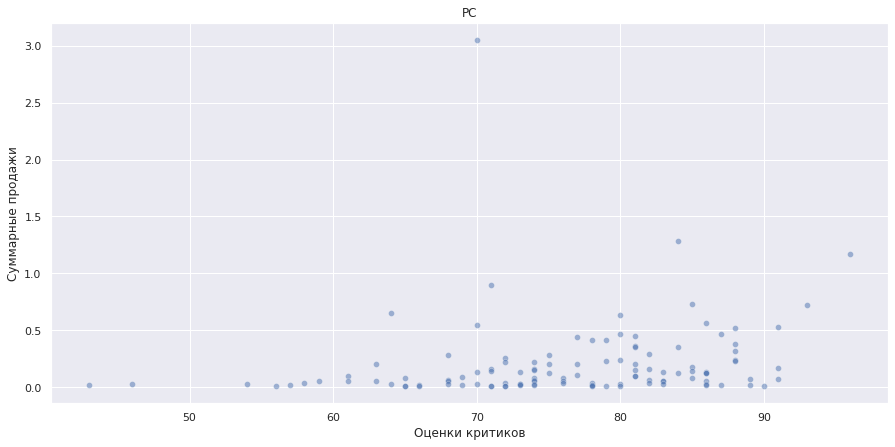

In [43]:
#График зависимости от оценок критиков на продажи
sns.scatterplot(data = df_new[df_new['platform']=='PC'], x = 'critic_score', y = 'sum_sales',alpha=0.5)\
.set(title='PC', xlabel='Оценки критиков', ylabel = 'Суммарные продажи'); 
print('Корреляция между оценкой критиков и продажами составляет:',\
      df_new.loc[df_new['platform']=='PC','sum_sales'].corr(df_new.loc[df_new['platform']=='PC','critic_score']
                                                             .astype('float64')))

**Люди больше покупают основываясь на оценках критиков, чем на оценках пользователей. Но корреляция не такая большая и зависит от платформы, так что нельзя утверждать, что хорошие оценки критиков гарантируют успех**

### Распределения жанров

In [45]:
sum_genre = df_new.pivot_table(index='genre',aggfunc='sum',values='sum_sales').sort_values('sum_sales',ascending=False)\
.reset_index()
#Найдем продажи по жанрам
sum_genre

,genre,sum_sales
0,Action,199.36
1,Shooter,170.94
2,Sports,109.48
3,Role-Playing,101.44
4,Misc,37.55
5,Fighting,28.22
6,Racing,27.52
7,Platform,18.09
8,Adventure,17.55
9,Simulation,13.13


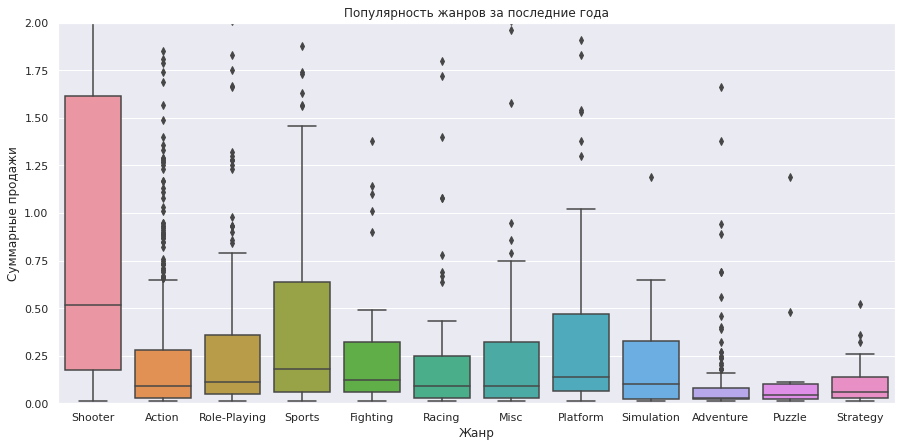

In [46]:
plt.ylim(0,2)
sns.boxplot(data=df_new,x='genre',y='sum_sales').set(title='Популярность жанров за последние года', xlabel='Жанр'\
                                                     ,ylabel = 'Суммарные продажи'); #Построим график продаж разных жанров по последним годам

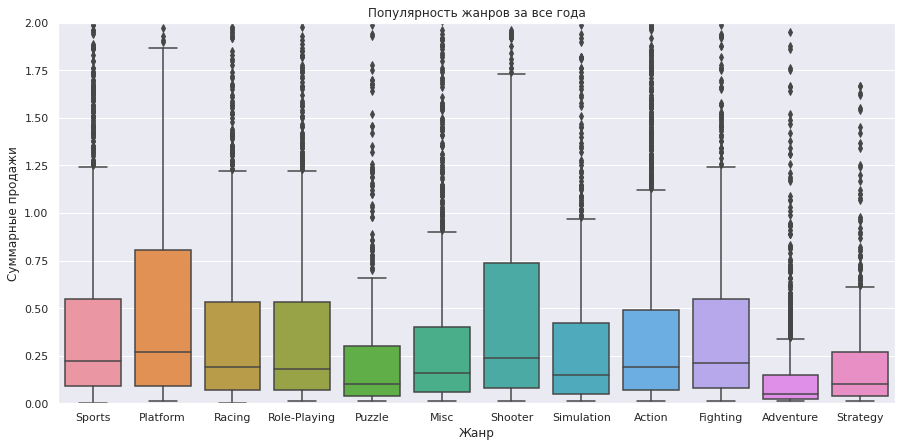

In [47]:
# Сравним его с графиком за все года
plt.ylim(0,2)
sns.boxplot(data=df,x='genre',y='sum_sales').set(title='Популярность жанров за все года', xlabel='Жанр'\
                                                     ,ylabel = 'Суммарные продажи');

**Можно заметить, что популярность на Shooter/Sports/Role-Playing возросла, а вот для ранее популярного Platform, в последние года имеет все меньше продаж**\
Так же интересно заметить, что в последние года у Action было много аномальных значений продаж, которые вывели жанр в топ-1 по продажам. 

Такие жанры как Puzzle/Adventure/Strategy пользуются меньшим спросом, чем все остальные

## Портрет пользователя по региону

### Разница платформ

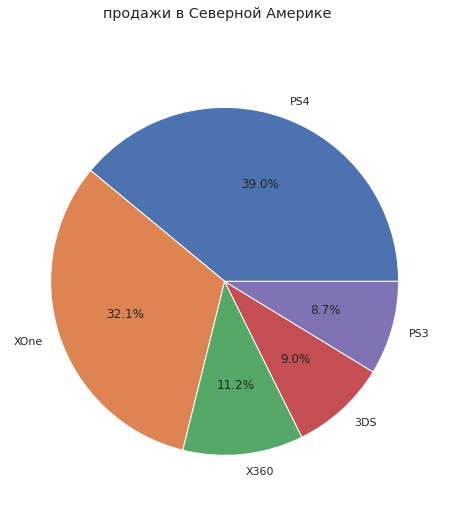

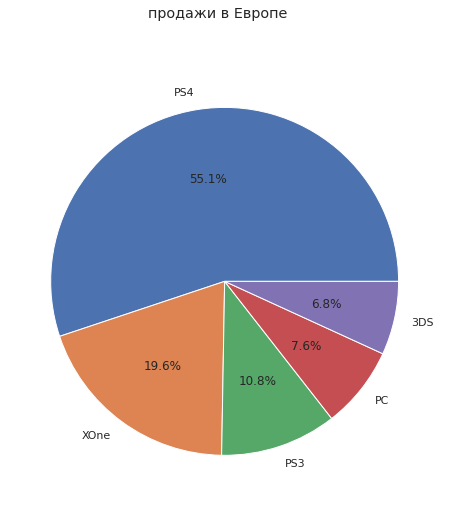

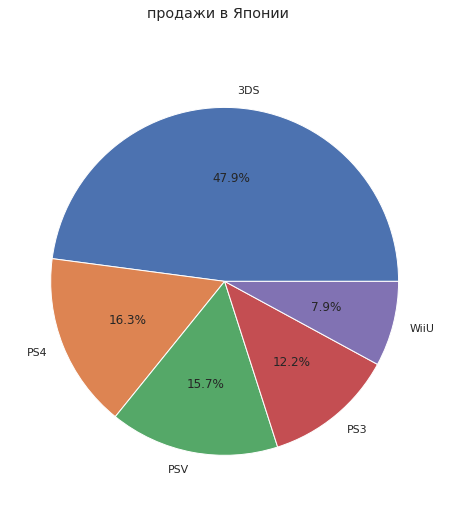

In [48]:
df_for_region = df[df['year_of_release']>=2014]
df_for_region.pivot_table(index='platform',values=['na_sales'],aggfunc='sum').sort_values('na_sales',ascending=False).head()\
.plot(kind='pie',subplots=True,figsize=(8,8),autopct='%1.1f%%',legend=False, ylabel='',title='продажи в Северной Америке')
df_for_region.pivot_table(index='platform',values=['eu_sales'],aggfunc='sum').sort_values('eu_sales',ascending=False).head()\
.plot(kind='pie',subplots=True,figsize=(8,8),autopct='%1.1f%%',legend=False, ylabel='',title='продажи в Европе')
df_for_region.pivot_table(index='platform',values=['jp_sales'],aggfunc='sum').sort_values('jp_sales',ascending=False).head()\
.plot(kind='pie',subplots=True,figsize=(8,8),autopct='%1.1f%%',legend=False, ylabel='',title='продажи в Японии')
#Построим круговые диаграммы
plt.show()

**Не удивительно, что Японский рынок очень сильно отличается от Америке и Европе:\
Самые популярные платформы это Nintendo 3DS и PS Vita, в то время как в Европе и Америке PS4 и Xbox One(Которого в китае вообще нет)**

### Разница жанров

In [49]:
pd.options.mode.chained_assignment = None #Отключим предупреждение об изменении df
#Напишем функцию для комбинирования непопулярных жанров в раздел Other
def plot_for_genre (region):
    t = df_for_region.pivot_table(index='genre',values=[region],aggfunc='sum').sort_values(region,ascending=False).reset_index()
    t['genre'][5:12] = 'Other'
    j = t.pivot_table(index='genre')
    return j.plot(kind='pie',subplots=True,figsize=(8,8),autopct='%1.1f%%',legend=False, ylabel='',title=region)

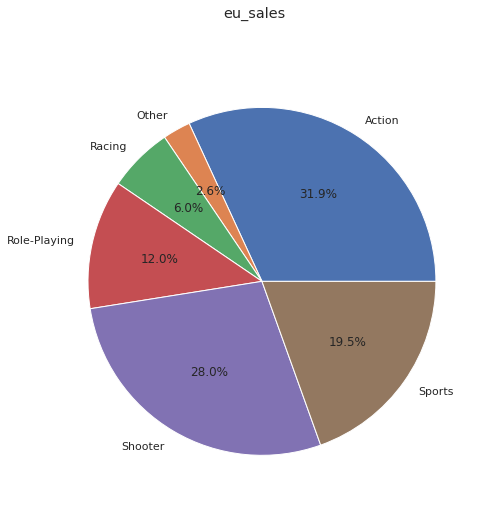

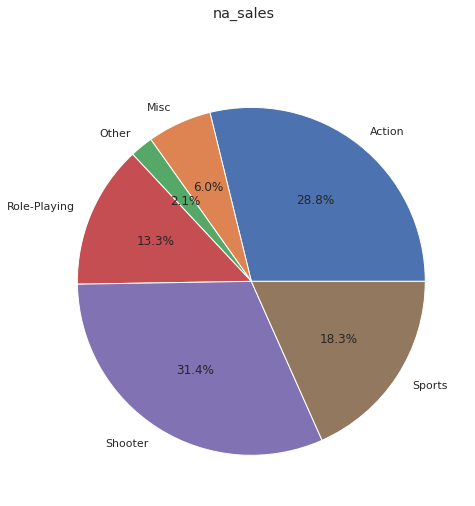

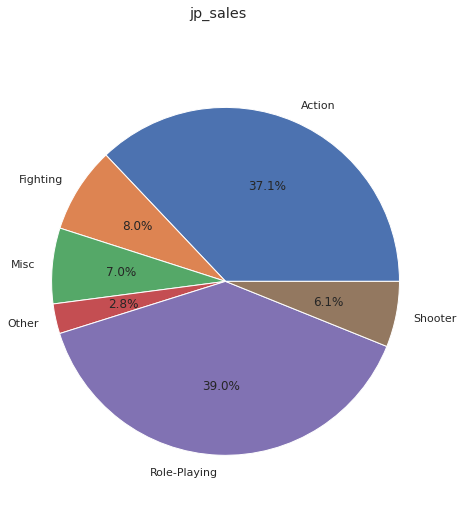

In [50]:
plot_for_genre('eu_sales');
plot_for_genre('na_sales');
plot_for_genre('jp_sales');
#Построим круговые диаграммы
plt.show()

**А вот различия по жанрам уже не такая большая, в Японии больше любят Role-Playing, а в Европе и Америке Sports/Shooter**

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

array([<AxesSubplot:>], dtype=object)

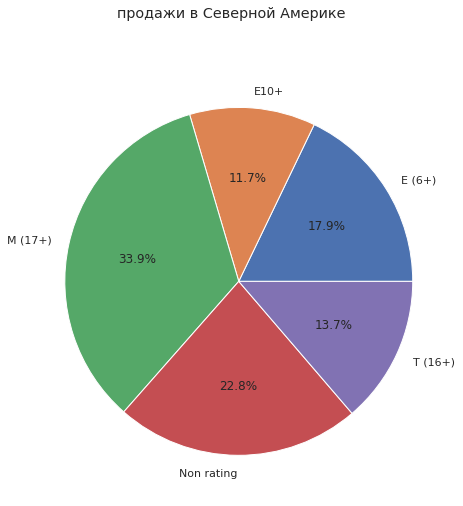

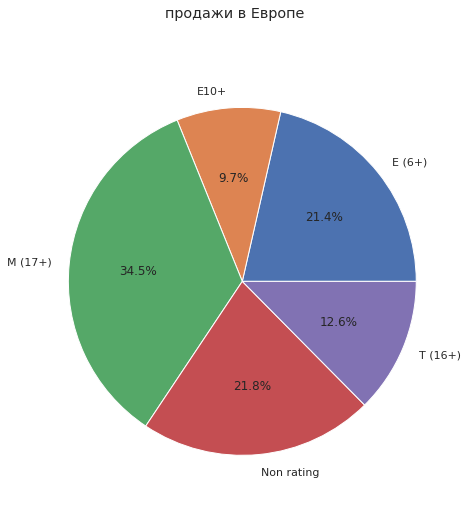

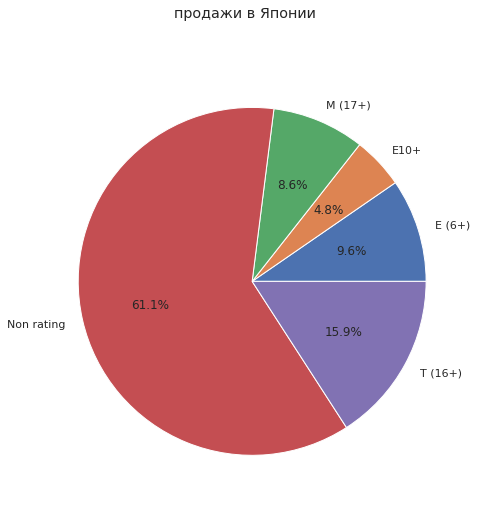

In [52]:
df_for_region.pivot_table(index='rating',values=['na_sales'],aggfunc='sum')\
.plot(kind='pie',subplots=True,figsize=(8,8),autopct='%1.1f%%',legend=False, ylabel='',title='продажи в Северной Америке')
df_for_region.pivot_table(index='rating',values=['eu_sales'],aggfunc='sum')\
.plot(kind='pie',subplots=True,figsize=(8,8),autopct='%1.1f%%',legend=False, ylabel='',title='продажи в Европе')
df_for_region.pivot_table(index='rating',values=['jp_sales'],aggfunc='sum')\
.plot(kind='pie',subplots=True,figsize=(8,8),autopct='%1.1f%%',legend=False, ylabel='',title='продажи в Японии')

**В Японии больше предпочитают игры рейтинга T, а вот в Европе и Америке любят более жестокие игры**

### Выводы

У Америки и Европы очень похожие вкусы, соотвсетвенно между этими двумя рынками нет большой разнцы. Но вот Япония очень сильно отличается от этих двух рынков, так что перед выходом на этот рынок надо подробнее его изучить

## Проверка гипотез

Гипотеза 1\
H0: Средний рейтинг Xbox One == PC\
H1: Средний рейтинг Xbox One != PC  

In [54]:
reit_xbox = df_new.loc[(df_new['platform']=='XOne') & (df_new['user_score'].notna() ),'user_score']
reit_pc = df_new.loc[(df_new['platform']=='PC') & (df_new['user_score'].notna() ),'user_score']

In [55]:
alpha = .05
results = st.ttest_ind(reit_xbox,reit_pc,equal_var=False)

print('p-value =',results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не можем отвергнуть нулевую гипотезу')

p-value = 0.11601398086668832
Не можем отвергнуть нулевую гипотезу


In [56]:
print('Средний рейтинг Xbox One = ',reit_xbox.mean())
print('Средний рейтинг PC = ', reit_pc.mean())

Средний рейтинг Xbox One =  6.594545454545456
Средний рейтинг PC =  6.298360655737705


In [57]:
reit_action = df_new.loc[(df_new['genre']=='Action') & (df_new['user_score'] > 0 ),'user_score']
reit_sports = df_new.loc[(df_new['genre']=='Sports') & (df_new['user_score'] > 0 ),'user_score']

In [58]:
alpha = .05
results = st.ttest_ind(reit_action,reit_sports,equal_var=False)

print('p-value =',results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не можем отвергнуть нулевую гипотезу')

p-value = 1.1825550382644557e-14
Отвергаем нулевую гипотезу


In [59]:
print('Средний рейтинг Action = ',reit_action.mean())
print('Средний рейтинг Sports = ', reit_sports.mean())

Средний рейтинг Action =  6.760606060606061
Средний рейтинг Sports =  5.2251968503937


### Выводы

В первой гипотезе:
Результат говорит о том, что нулевая гипотеза не отвергается.
p-значение: 0.11601398086668832
Во второй гипотезе:
Результат говорит о том, что нулевая гипотеза отвергается.
p-значение: 1.1825550382644557e-14

## Выводы

Проведенна работа с данными из открытого доступа.
Лучше всего игры продаются в Северной Америке (4341 млн. копий) и Европе (2399 млн. копий), а Япония отстает (1290 млн. копий)\
Так что лучше сосредоточить рекламную компанию в Северной Америке и Европе. Для этого лучше выбрать игры на платформе PS4(\
55% рынка и 39% рынка соответственно)/XOne (19.6% рынка и 32% рынка соответственно). Жанры Action(28.8% рынка и 32% рынка соответственно)/Shooter (31.4% рынка и 28% рынка соответственно). Рейтинг ESRB M (33.9% рынка и 34.5% рынка соответственно)

Если это Япония, то надо соредоточиться на рекламе игр на платформе Nintendo 3DS (47.9%) и PS4(16.3%). Жанры: Action(37.1%)/Role-playing(39%). Для выбора игр по рейтингу надо допонить данные рейтингом Японии, потому что рейтинг ESRB хорошо работает только в Европе и Северной Америке.

Есть слабая корреляция между отзывыми критиков и продажами игр, но она не достаточно сильна, чтобы оценивать игру только по этому критерию

